<a href="https://colab.research.google.com/github/SUHANI-21/MachineLearningLab/blob/main/LinearReg_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project implements a Simple Linear Regression model to predict Petal Length based on Sepal Length in the Iris dataset.
It visualizes the relationship and the regression line using Matplotlib and Seaborn.

In [17]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.datasets import load_iris
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(
    data = np.c_[iris['data'], iris['target']],
    columns = iris['feature_names'] + ['target']
)

# Rename columns for easier use
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

print(" Data Loaded Successfully!")
print(df.head())



 Data Loaded Successfully!
   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2      0.0
1           4.9          3.0           1.4          0.2      0.0
2           4.7          3.2           1.3          0.2      0.0
3           4.6          3.1           1.5          0.2      0.0
4           5.0          3.6           1.4          0.2      0.0


In [18]:
print("\n Dataset Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())




 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB
None

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Statistical Summary:
        sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.8000

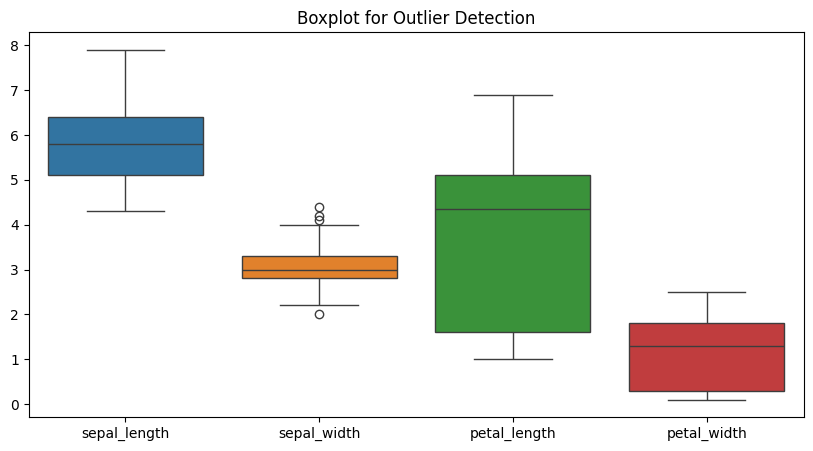

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [20]:
# Convert target numeric → species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# One-hot encode species (drop_first=True to avoid dummy variable trap)
df = pd.get_dummies(df, columns=['species'], drop_first=True)

print("\n After One-Hot Encoding:\n", df.head())




 After One-Hot Encoding:
    sepal_length  sepal_width  petal_length  petal_width  species_versicolor  \
0           5.1          3.5           1.4          0.2               False   
1           4.9          3.0           1.4          0.2               False   
2           4.7          3.2           1.3          0.2               False   
3           4.6          3.1           1.5          0.2               False   
4           5.0          3.6           1.4          0.2               False   

   species_virginica  
0              False  
1              False  
2              False  
3              False  
4              False  


In [21]:
X = df.drop('petal_length', axis=1)
y = df['petal_length']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [22]:
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [23]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")



 Model Evaluation Results:
Mean Absolute Error (MAE): 0.227
Mean Squared Error (MSE): 0.088
Root Mean Squared Error (RMSE): 0.296
R² Score: 0.973


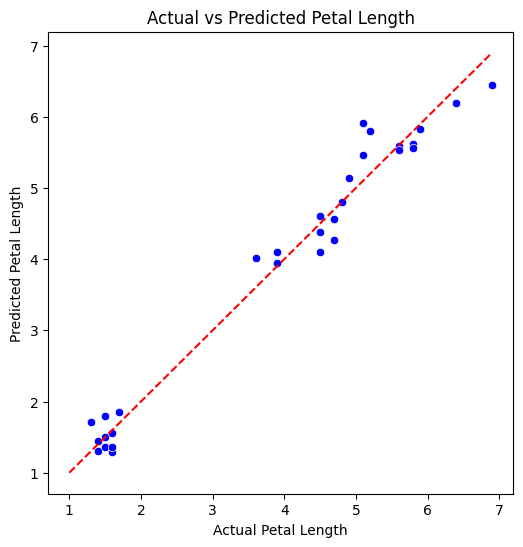

In [24]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Petal Length")
plt.ylabel("Predicted Petal Length")
plt.title("Actual vs Predicted Petal Length")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45° reference line
plt.show()



 Feature Coefficients:
               Feature  Coefficient
4   species_virginica     1.973488
3  species_versicolor     1.459235
2         petal_width     0.640298
0        sepal_length     0.584976
1         sepal_width    -0.145089


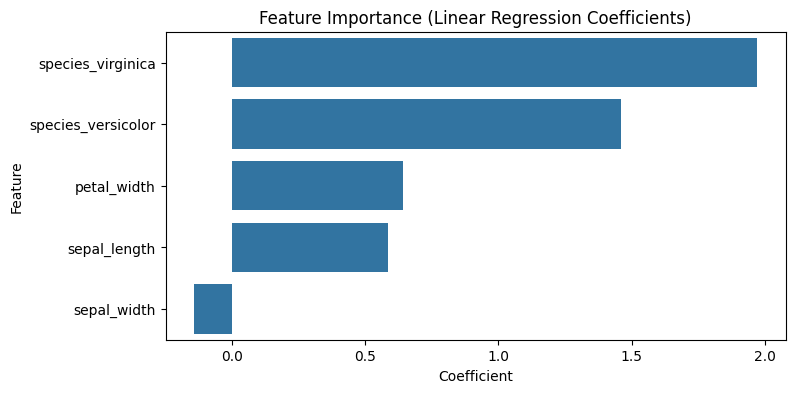


 Linear Regression project completed successfully!


In [25]:
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n Feature Coefficients:\n", coeff_df)

plt.figure(figsize=(8,4))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

print("\n Linear Regression project completed successfully!")
